---

In [ ]:
# 1. Creat demo.xlsx

In [ ]:
# import numpy as np
# import pandas as pd
# np.random.seed(1)
# data = pd.DataFrame({
#     'label': np.random.randint(0, 2, 500),
#     'age': np.random.randint(18, 70, 500),
#     'sex': np.random.randint(0, 2, 500),
#     'height': np.random.randint(140, 200, 500),
#     'weight': np.random.randint(40, 100, 500)
# })
# data['bsa'] = round(0.0061 * data['height'] + 0.0128 * data['weight'] - 0.1529, 3)
# data['bmi'] = round(data['weight'] / (data['height']/100)**2, 1)

# data['label'] = data['height'].apply(lambda x : 1 if x in range(155,180) else 0) & \
#                 data['weight'].apply(lambda x : 1 if x in range(45,70) else 0)

# data.to_excel('demo.xlsx', index=False)

In [ ]:
# 2. Fast Evaluation

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# datafile = 'demo.xlsx'
# data = pd.read_excel(datafile)
# X, y = data.values[:, 1:], data.values[:, 0]
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)
# result = accuracy_score(y_test, y_predict)
# print(result)

In [ ]:
# 3. Try It Yourself

In [ ]:
# test = pd.DataFrame({
#     'age':[23],
#     'sex':[1],
#     'height':[140],
#     'weight':[65]
# })
# print(model.predict(test))

---

In [ ]:
# 4. Chi Square Test

In [ ]:
# * 卡方检验（2*2表格）
#     - 所有的理论数T≥5并且总样本量n≥40，用Pearson卡方进行检验。
#     - 如果理论数T＜5但T≥1，并且n≥40，用连续性校正的卡方进行检验。
#     - 如果有理论数T＜1或n＜40，则用Fisher’s检验。
#     - 非2*2表格直接使用stats.chi2_contingency(cross_table)

# * R×C表卡方检验应用条件：
#   - R×C表中理论数小于5的格子不能超过1／5；
#   - 不能有小于1的理论数。如果实验中有不符合R×C表的卡方检验，可以通过增加样本数、列合并来实现。

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy import stats

# data = pd.read_excel('demo.xlsx')
# cross_table = pd.crosstab(data['label'], data['sex'], margins=True)
# print(cross_table)

# # cross_table = np.array([
# #     [43, 96],
# #     [28, 84]
# #     ])

# result = stats.chi2_contingency(cross_table, correction=False)  # Pearson Test
# # result = stats.chi2_contingency(cross_table, correction=True) # 连续性校正
# # result = stats.fisher_exact(cross_table) # Fisher's Test

# print(pd.DataFrame(result[3])) # 理论数表
# print(f'X2= {round(result[0],3)}, p= {round(result[1],3)}')

In [ ]:
# 5. Independent two-sample t-test

In [ ]:
# from scipy import stats
# import pandas as pd

# data = pd.read_excel('demo.xlsx')

# group = 'label'
# feature = 'height'
# print(round(data.groupby(group).mean(),2))

# group_0, group_1 = data[data[group]==0], data[data[group]==1]
# levene_p = round(stats.levene(group_0[feature], group_1[feature])[1], 3)
# print("Levene's Test p =", levene_p)

# if levene_p > 0.05:
#     test = 'Student'
#     statistic, pvalue = stats.ttest_ind(group_0[feature], group_1[feature], equal_var=True) # if p>0.05 Student's t-test
# else:
#     test = 'Welch'
#     statistic, pvalue = stats.ttest_ind(group_0[feature], group_1[feature], equal_var=False) # if p<0.05 Welch's t-test 

# print(f'test = {test}, stat = {round(statistic,4)}, p = {round(pvalue,3)}')

In [ ]:
import pandas as pd

data = pd.read_excel('demo.xlsx')

In [ ]:
data

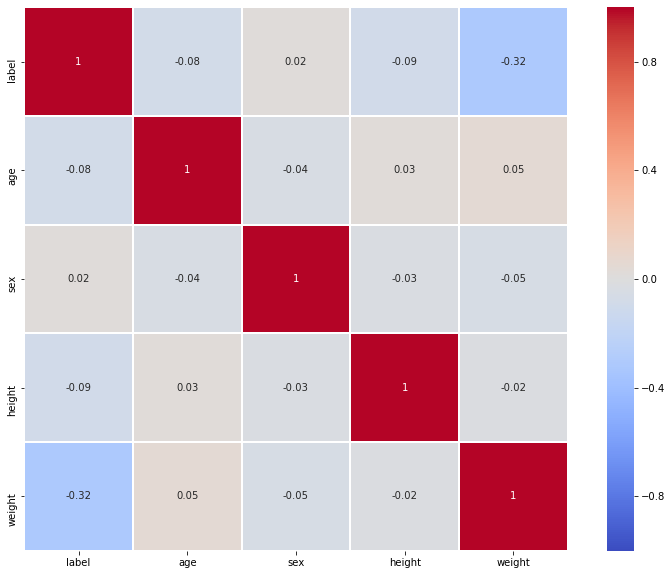

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(round(data.corr(),2), linewidths=1, square=True, cmap='coolwarm', 
            linecolor='white', annot=True, vmax=1, vmin=-1);
# plt.savefig('Heatmap.svg')